In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Adidas US Sales Datasets.csv")

print("Shape of the dataset (rows, columns):", df.shape)

Shape of the dataset (rows, columns): (9648, 13)


In [4]:
print("Dataset Info",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9641 non-null   object
 8   Units Sold        9646 non-null   object
 9   Total Sales       9647 non-null   object
 10  Operating Profit  9645 non-null   object
 11  Operating Margin  9642 non-null   object
 12  Sales Method      9647 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB
Dataset Info None


In [5]:
print("First 5 Rows")
print(df.head())
print("Statistical Summary")
print(df.describe())

First 5 Rows
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   01-01-2020  Northeast  New York  New York   
1  Foot Locker      1185732   02-01-2020  Northeast  New York  New York   
2  Foot Locker      1185732   03-01-2020  Northeast  New York  New York   
3  Foot Locker      1185732   04-01-2020  Northeast  New York  New York   
4  Foot Locker      1185732   05-01-2020  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200  $6,00,000    
1    Men's Athletic Footwear        $50.00       1,000  $5,00,000    
2    Women's Street Footwear        $40.00       1,000  $4,00,000    
3  Women's Athletic Footwear        $45.00         850  $3,82,500    
4              Men's Apparel        $60.00         900  $5,40,000    

  Operating Profit Operating Margin Sales Method  
0       $3,00,000               50%     In-store  
1       $1,50

In [4]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      7
Units Sold          2
Total Sales         1
Operating Profit    3
Operating Margin    6
Sales Method        1
dtype: int64


In [6]:
df = df.dropna(how='all')

In [7]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing Values")
print(df.isnull().sum()) 

Missing Values
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_11776\1884130616.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_11776\1884130616.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [8]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")

Removed 0 duplicate rows.


In [9]:
if 'Invoice Date' in df.columns:
    df['Invoice Date'] = pd.to_datetime(df['Invoice Date'], errors='coerce')
if 'Invoice Date' in df.columns:
    df['Year'] = df['Invoice Date'].dt.year
    df['Month'] = df['Invoice Date'].dt.month_name()
    print("\n month",df["Month"])


 month 0        January
1       February
2          March
3          April
4            May
          ...   
9643         NaN
9644         NaN
9645         NaN
9646         NaN
9647         NaN
Name: Month, Length: 9648, dtype: object


In [10]:
if all(col in df.columns for col in ['Retailer', 'Total Sales']):
    sales_by_retailer = df.groupby('Retailer')['Total Sales'].sum().reset_index()
    print("\n--- Total Sales by Retailer ---")
    print(sales_by_retailer.head())


--- Total Sales by Retailer ---
        Retailer                                        Total Sales
0         Amazon  $1,80,000 $1,00,000 $75,000 $35,000 $75,000 $1...
1    Foot Locker  $6,00,000 $5,00,000 $4,00,000 $3,82,500 $5,40,...
2         Kohl's  $2,45,000 $3,15,000 $3,15,000 $2,47,500 $2,50,...
3  Sports Direct  $2,25,000 $3,15,000 $2,45,000 $2,45,000 $2,20,...
4        Walmart  $5,40,000 $6,98,750 $7,20,000 $5,50,000 $4,62,...


In [11]:
print(" Cleaned Dataset Info ")
df.info()

 Cleaned Dataset Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      4065 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   object        
 8   Units Sold        9648 non-null   object        
 9   Total Sales       9648 non-null   object        
 10  Operating Profit  9648 non-null   object        
 11  Operating Margin  9648 non-null   object        
 12  Sales Method      9648 non-null   object        
 13  Year              4065 non-null   float64       
 14  M

In [12]:
print(" Sample of Cleaned Data ")
print(df.head())

 Sample of Cleaned Data 
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-02-01  Northeast  New York  New York   
2  Foot Locker      1185732   2020-03-01  Northeast  New York  New York   
3  Foot Locker      1185732   2020-04-01  Northeast  New York  New York   
4  Foot Locker      1185732   2020-05-01  Northeast  New York  New York   

                     Product Price per Unit Units Sold Total Sales  \
0      Men's Street Footwear        $50.00       1,200  $6,00,000    
1    Men's Athletic Footwear        $50.00       1,000  $5,00,000    
2    Women's Street Footwear        $40.00       1,000  $4,00,000    
3  Women's Athletic Footwear        $45.00         850  $3,82,500    
4              Men's Apparel        $60.00         900  $5,40,000    

  Operating Profit Operating Margin Sales Method    Year     Month  
0       $3,00,000               50

In [13]:
for col in ['Units Sold', 'Price per Unit']:
    if col in df.columns:
        df[col] = df[col].astype(str).replace('[\$,]', '', regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("\n--- Univariate Analysis ---")
print(df.describe(include='all'))


--- Univariate Analysis ---
           Retailer   Retailer ID                   Invoice Date Region  \
count          9648  9.648000e+03                           4065   9648   
unique            6           NaN                            NaN      5   
top     Foot Locker           NaN                            NaN   West   
freq           2637           NaN                            NaN   2448   
mean            NaN  1.173850e+06  2021-06-05 14:07:42.287822848    NaN   
min             NaN  1.128299e+06            2020-01-01 00:00:00    NaN   
25%             NaN  1.185732e+06            2021-04-02 00:00:00    NaN   
50%             NaN  1.185732e+06            2021-07-08 00:00:00    NaN   
75%             NaN  1.185732e+06            2021-10-07 00:00:00    NaN   
max             NaN  1.197831e+06            2021-12-12 00:00:00    NaN   
std             NaN  2.636038e+04                            NaN    NaN   

        State      City                Product  Price per Unit   Units

In [14]:
for col in ["Operating Profit", "Total Sales", "Units Sold", "Price per Unit"]:
    
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].replace('[\$,]', '', regex=True).str.strip(), errors='coerce')
    else:
        
        df[col] = pd.to_numeric(df[col], errors='coerce')


df["Revenue"] = df["Units Sold"] * df["Price per Unit"]
df["Profit Margin (%)"] = (df["Operating Profit"]/df["Total Sales"]) * 100
df["Profit per Unit"] = df["Operating Profit"] / df["Units Sold"]

In [15]:
print(" Sample of Cleaned Data ")
print(df.head())

 Sample of Cleaned Data 
      Retailer  Retailer ID Invoice Date     Region     State      City  \
0  Foot Locker      1185732   2020-01-01  Northeast  New York  New York   
1  Foot Locker      1185732   2020-02-01  Northeast  New York  New York   
2  Foot Locker      1185732   2020-03-01  Northeast  New York  New York   
3  Foot Locker      1185732   2020-04-01  Northeast  New York  New York   
4  Foot Locker      1185732   2020-05-01  Northeast  New York  New York   

                     Product  Price per Unit  Units Sold  Total Sales  \
0      Men's Street Footwear            50.0        1200       600000   
1    Men's Athletic Footwear            50.0        1000       500000   
2    Women's Street Footwear            40.0        1000       400000   
3  Women's Athletic Footwear            45.0         850       382500   
4              Men's Apparel            60.0         900       540000   

   Operating Profit Operating Margin Sales Method    Year     Month  Revenue  \
0    

In [16]:
product_summary = df.groupby("Product", as_index=False).agg({
    "Revenue": "sum",
    "Operating Profit": "sum",
    "Units Sold": "sum",
    "Profit Margin (%)": "mean"
}).sort_values("Revenue", ascending=False)

print("\n=== Top Products by Revenue ===")
print(product_summary.head(10))


=== Top Products by Revenue ===
                     Product     Revenue  Operating Profit  Units Sold  \
2      Men's Street Footwear  27676419.0          82802323      593320   
3            Women's Apparel  23833180.0          68610996      433052   
1    Men's Athletic Footwear  20577180.0          51846964      435526   
5    Women's Street Footwear  17198825.0          45095897      392269   
0              Men's Apparel  16523632.0          44763099      306758   
4  Women's Athletic Footwear  14319021.0          39028343      317236   

   Profit Margin (%)  
2          44.613215  
3          44.179105  
1          40.270587  
5          41.020763  
0          41.322911  
4          42.446907  


In [17]:
sales_method_summary = df.groupby("Sales Method", as_index=False).agg({
    "Revenue": "sum",
    "Operating Profit": "mean",
    "Profit Margin (%)": "mean"
}).sort_values("Revenue", ascending=False)

print("\n=== Revenue by Sales Method ===")
print(sales_method_summary)


=== Revenue by Sales Method ===
  Sales Method     Revenue  Operating Profit  Profit Margin (%)
1       Online  44977705.0      19766.940082          46.424634
2       Outlet  39484027.0      35740.027502          39.492426
0     In-store  35666525.0      73347.058621          35.629932


In [18]:
region_summary = df.groupby("Region", as_index=False).agg({
    "Revenue": "sum",
    "Operating Profit": "sum",
    "Profit Margin (%)": "mean",
}).sort_values("Revenue", ascending=False)

print("=== Revenue by Region ===")
print(region_summary)

=== Revenue by Region ===
      Region     Revenue  Operating Profit  Profit Margin (%)
4       West  36432621.0          89609516          39.669518
1  Northeast  25039612.0          68033188          41.092258
3  Southeast  21374436.0          60555462          41.916685
2      South  20603356.0          61138044          46.690066
0    Midwest  16678232.0          52811412          43.520454


C:\Users\User\AppData\Local\Temp\ipykernel_11776\1481693626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sales Method", palette="Set1")
C:\Users\User\AppData\Local\Temp\ipykernel_11776\1481693626.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Region")


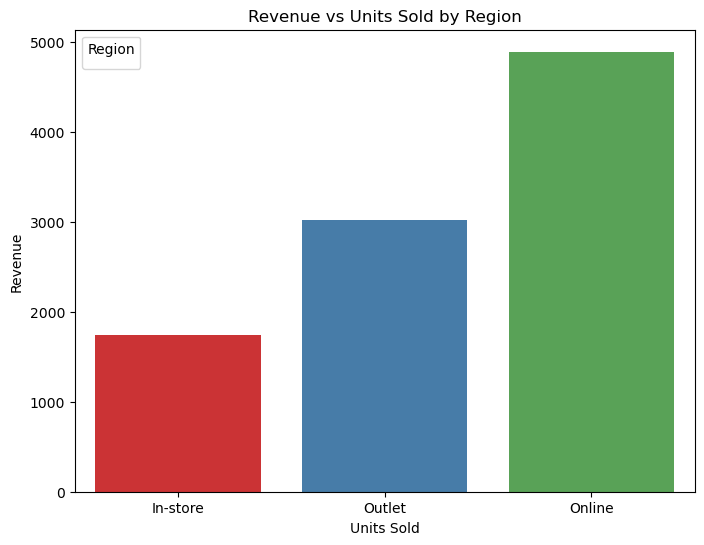

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sales Method", palette="Set1")
plt.title("Revenue vs Units Sold by Region")
plt.xlabel("Units Sold")
plt.ylabel("Revenue")
plt.legend(title="Region")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11776\1002169239.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Month", y="Revenue", hue="Region", estimator="sum", ci=None)


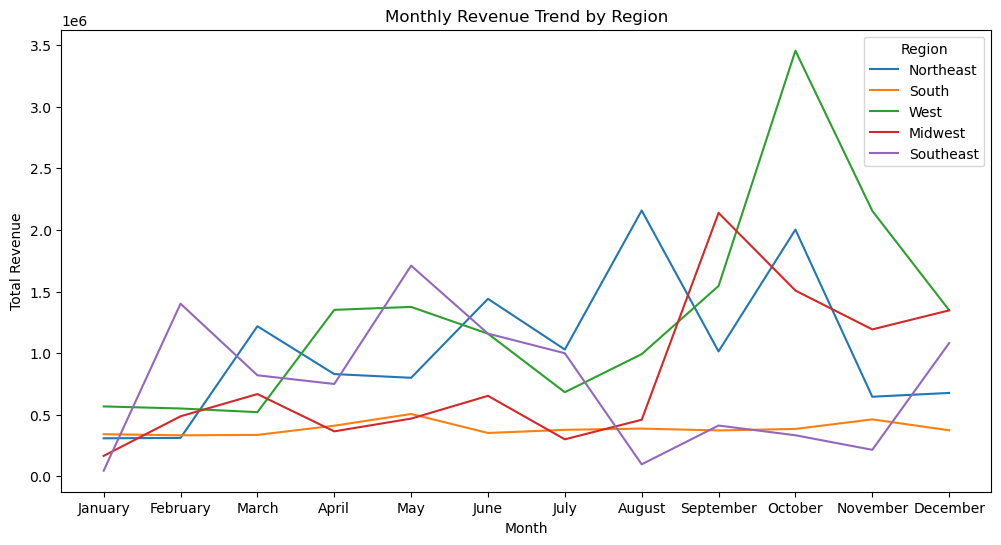

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Revenue", hue="Region", estimator="sum", ci=None)
plt.title("Monthly Revenue Trend by Region")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.legend(title="Region")
plt.show()

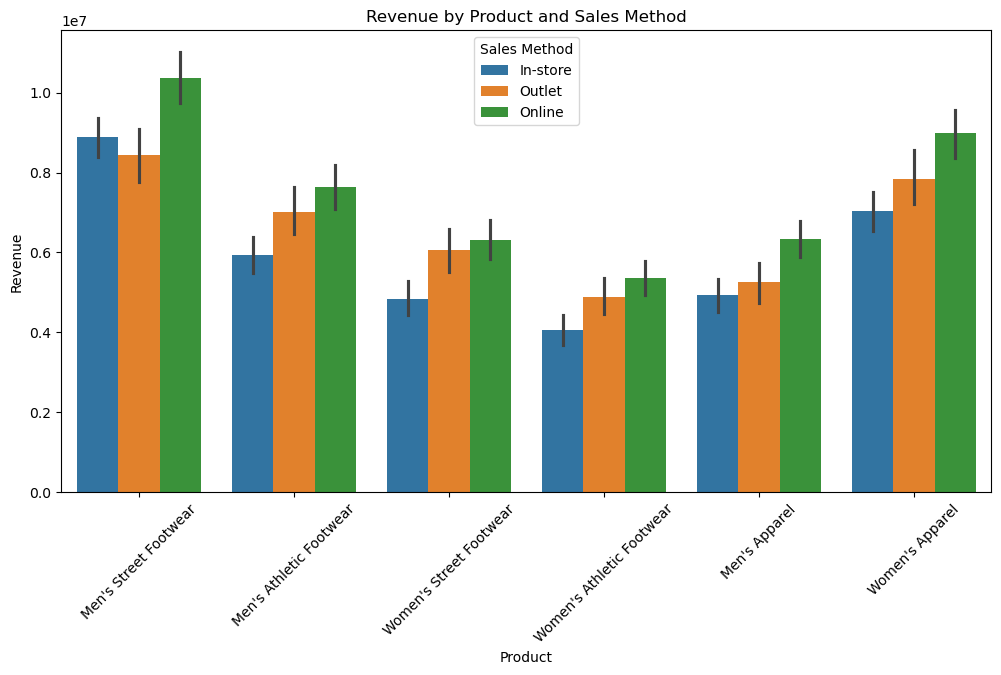

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Product", y="Revenue", hue="Sales Method", estimator="sum")
plt.title("Revenue by Product and Sales Method")
plt.xticks(rotation=45)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11776\322385733.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities, x="Revenue", y="City", palette="viridis")


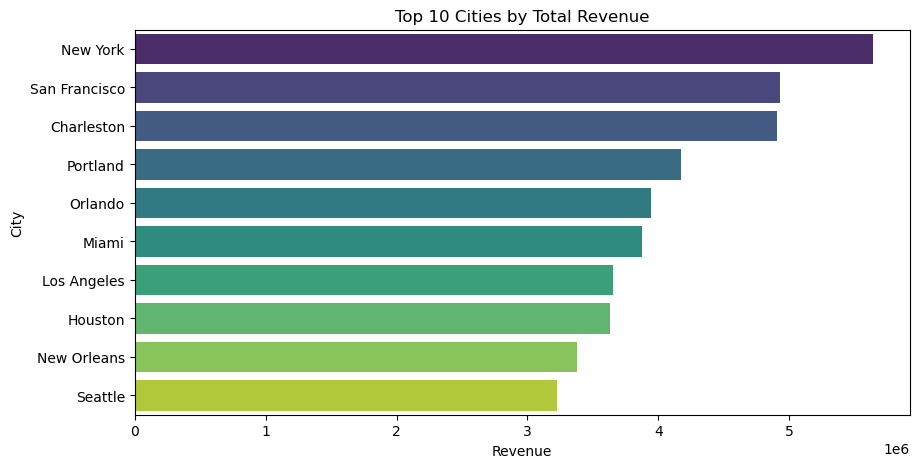

In [22]:
top_cities = df.groupby("City")["Revenue"].sum().nlargest(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=top_cities, x="Revenue", y="City", palette="viridis")
plt.title("Top 10 Cities by Total Revenue")
plt.xlabel("Revenue")
plt.ylabel("City")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_11776\528726596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby("Product")["Revenue"].sum().reset_index(),


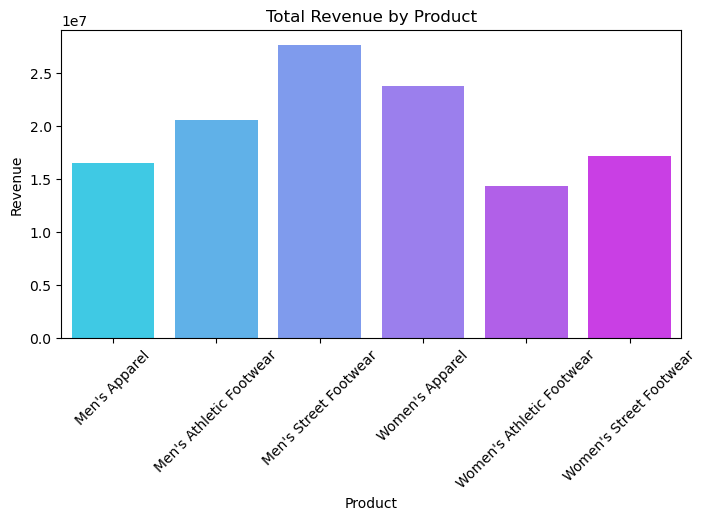

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df.groupby("Product")["Revenue"].sum().reset_index(),
            x="Product", y="Revenue", palette="cool")
plt.title("Total Revenue by Product")
plt.xticks(rotation=45)
plt.show()

In [24]:
print(df.columns.tolist())

['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City', 'Product', 'Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method', 'Year', 'Month', 'Revenue', 'Profit Margin (%)', 'Profit per Unit']


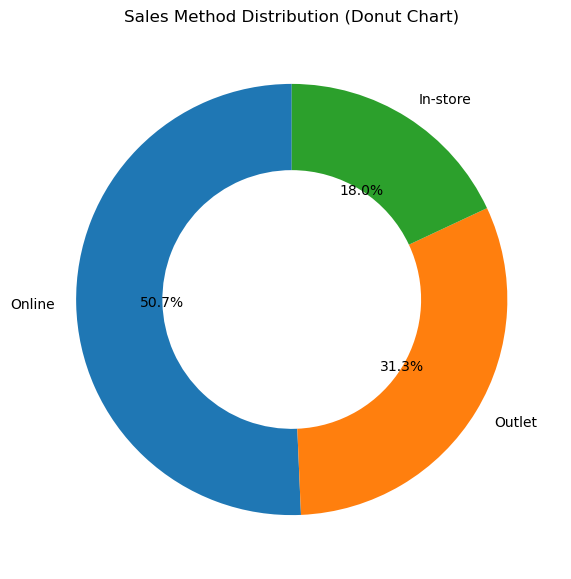

In [38]:
sales_method_counts = df["Sales Method"].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    sales_method_counts,
    labels=sales_method_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    wedgeprops={'width':0.4},
)
plt.title("Sales Method Distribution (Donut Chart)")
plt.show()

In [27]:
insights = []

total_revenue = df["Revenue"].sum()
insights.append(f"Total Revenue: ${total_revenue:,.2f}")

In [31]:
date_range = pd.date_range(start='2022-01-01', periods=12, freq='M')
values = np.random.randint(1000, 5000, size=12)
monthly = pd.Series(values, index=date_range)

date_col = True
if date_col:
    best_month = monthly.idxmax()
    best_value = monthly.max()
    insights.append(f"Best Month: {best_month.strftime('%B %Y')} (${best_value:,.2f})")

C:\Users\User\AppData\Local\Temp\ipykernel_11776\743687299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2022-01-01', periods=12, freq='M')


In [32]:
if "Region" in df.columns:
    top_region = df.groupby("Region")["Revenue"].sum().sort_values(ascending=False).head(1)
    insights.append(f"Top Region: {top_region.index[0]} (${top_region.values[0]:,.2f})")

In [40]:
print("\n--- Key Insights ---")
for i in insights:
    print("-", i)


--- Key Insights ---
- Total Revenue: $120,128,257.00
- Best Month: April 2022 ($4,963.00)
- Top Region: West ($36,432,621.00)
